In [1]:
from data_generation import *
from binnings import *
import matplotlib.pyplot as plt
import numpy as np
from calibration_functions import *
from calibration_function_derivates import *

In [2]:
dirichlet = [1,1]
cf = beta1
n_data = 3000
seed = 1

p, y, c = generate_data(dirichlet, n_data, cf, seed=seed)

# Fig 1. Calibration map

C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\kood\abifailid\calibration_functions.py:59: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )


[0.10782421 0.33366811 0.52812253 0.98196888 0.9934816  0.6891436
 0.75695914 0.24201893 0.50944198 0.82687219 0.57466383 0.17705686
 0.10459636 0.03538545 0.55169943 0.76236596 0.36137214 0.29454245
 0.15201    0.8572848  0.88578174 0.32112549 0.39422168 0.32563731
 0.89557931 0.15283141 0.36132143 0.10570435 0.32906846 0.00540336
 0.92270173 0.58691642 0.75499272 0.33523009 0.4901708  0.25404897
 0.00857972 0.48670878 0.70743582 0.59382478 0.46378032 0.31903449
 0.31542984 0.10665581 0.18712335 0.05471632 0.94876159 0.41128704
 0.70571647 0.19833322 0.44561082 0.40702856 0.21028688 0.68098209
 0.20287828 0.97607081 0.71550266 0.24218222 0.81727754 0.81713186
 0.79755763 0.9287246  0.84731124 0.16538202 0.69166217]


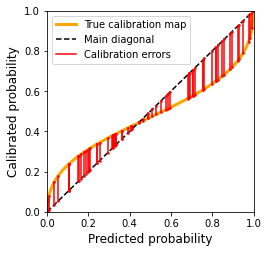

In [9]:
def create_fig_1_calmap(p,y,cf):
    plt.figure(figsize=(3.7,3.7))

    x_range = np.arange(0.0, 1.01, 0.01)

    # CF
    plt.plot(x_range, cf(x_range), c="orange", label="True calibration map", zorder=1, lw=3)

    # DIAGONAL
    plt.plot([0,1], [0,1], "--", c="black", label="Main diagonal", zorder=1)


    # RED LINES
    np.random.seed(0)
    p_select = np.random.choice(p, 65, False)
    print(p_select)
    r_alpha = 1
    r_lw = 1.5
    r_s = 8
    #"""
    plt.plot([p_select[0], p_select[0]], [p_select[0], cf(p_select[0])], "-", c="red", alpha=r_alpha, label="Calibration errors", lw=r_lw)
    for pred in p_select[1:]:
        plt.plot([pred, pred], [pred, cf(pred)], "-", c="red", alpha=r_alpha, lw=r_lw)
        
    # RED DOTS
    plt.scatter(p_select, p_select, marker=".", c="red", s=r_s, zorder=2)
    plt.scatter(p_select, cf(p_select), marker=".", c="red", s=r_s, zorder=2)
    
    #"""
    # Y
    #plt.scatter(p, y, marker=".", c="blue", s=25, zorder=2)
    

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("Predicted probability", fontsize=12)
    plt.ylabel("Calibrated probability", fontsize=12)
    plt.title("")
    plt.legend()

    plt.savefig("fig/fig1_calmap.png", dpi=250, bbox_inches="tight")
    plt.show()
    
create_fig_1_calmap(p,y,cf)

# Fig 2. Rel diag classic

C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\kood\abifailid\calibration_functions.py:59: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )


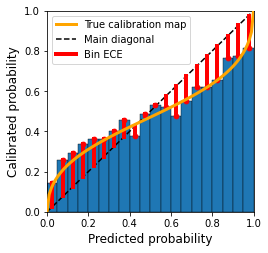

In [6]:
def create_fig_2_reldiag(p,y,c):
    fig, ax = plt.subplots(figsize=(3.7,3.7))

    x_range = np.arange(0.0, 1.01, 0.01)

    # CF
    plt.plot(x_range, cf(x_range), c="orange", label="True calibration map", zorder=4, lw=3)

    # DIAGONAL
    plt.plot([0,1], [0,1], "--", c="black", label="Main diagonal", zorder=2)


    # BINNING
    binning = EqualWidthBinning(p,y,c,20)
    
    polygons = binning.construct_plt_polygons_flat()

    for polygon in polygons:
        polygon.set_alpha(1)
        ax.add_line(polygon)
        
    # RED LINES + RED DOTS
    r_alpha = 1
    r_lw = 4
    r_size = 90
    
    mean_p = np.mean(binning.binned_p[0])
    mean_y = np.mean(binning.binned_y[0])
    
    plt.plot([0,0], [0,0], "-", label="Bin ECE", c="red", alpha=r_alpha, lw=r_lw)
    for idx in range(len(binning.binned_p)):
        mean_p = np.mean(binning.binned_p[idx])
        mean_y = np.mean(binning.binned_y[idx])
        
        plt.plot([mean_p, mean_p], [mean_y, mean_p], "-", c="red", alpha=r_alpha, lw=r_lw)
        #plt.scatter(mean_p, mean_p, marker=".", c="red", s=r_size, zorder=2)
        plt.scatter(mean_p, mean_y, marker=".", c="red", s=r_size, zorder=3)
    
    # DATA DIST
    #for i in range(len(p)):
    #    plt.plot([p[i], p[i]], [1, 1.05], c="blue" if y[i] == 1 else "red", zorder=2, lw=0.5)

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("Predicted probability", fontsize=12)
    plt.ylabel("Calibrated probability", fontsize=12)
    plt.title("")
    plt.legend()#loc=(0.04, 0.76))

    plt.savefig("fig/fig2_reldiag.png", dpi=250, bbox_inches="tight")
    plt.show()
    
create_fig_2_reldiag(p,y,c)

# Fig 3. ECE as slope1

C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\kood\abifailid\calibration_functions.py:59: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )


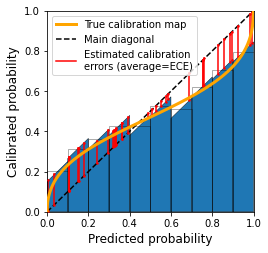

In [37]:
def create_fig_3_slope1_fit(p,y,c):
    fig, ax = plt.subplots(figsize=(3.7,3.7))

    x_range = np.arange(0.0, 1.001, 0.001)

    # CF
    plt.plot(x_range, cf(x_range), c="orange", label="True calibration map", zorder=4, lw=3)

    # DIAGONAL
    plt.plot([0,1], [0,1], "--", c="black", label="Main diagonal", zorder=2)

    # BINNING
    binning = EqualWidthBinning(p,y,c,10)
    #plt.plot(x_range, binning.eval_slope_1(x_range), c="blue", label="Estimated map", zorder=2)

    polygons = binning.construct_plt_polygons_slope_1()

    for polygon in polygons:
        polygon.set_alpha(1)
        ax.add_line(polygon)
      
    # FLAT BINNING LOW ALPHA
    polygons = binning.construct_plt_polygons_flat()

    for polygon in polygons:
        polygon.set_alpha(0.4)
        polygon.set_linewidth(0.8)
        polygon.set_color("black")
        polygon.set_facecolor("none")
        ax.add_line(polygon)
        
    r_alpha = 1
    r_lw = 4
    r_size = 90
    
    for idx in range(len(binning.binned_p)):
        mean_p = np.mean(binning.binned_p[idx])
        mean_y = np.mean(binning.binned_y[idx])
        #plt.scatter(mean_p, mean_y, marker=".", c="red", s=r_size, zorder=2, alpha=r_alpha)
                
    # RED LINES
    np.random.seed(0)
    p_select = np.random.choice(p, 35, False)
    
    r_alpha = 1
    r_lw = 1.5
    
    plt.plot([0,0], [0,0], "-", c="red", alpha=r_alpha, label="Estimated calibration\nerrors (average=ECE)", lw=r_lw)
    for pred in p_select:
        plt.plot([pred, pred], [pred, binning.eval_slope_1(pred)], "-", c="red", alpha=r_alpha, lw=r_lw)
        
    # RED DOTS
    r_size = 8
    plt.scatter(p_select, p_select, marker=".", c="red", s=r_size, zorder=3)
    plt.scatter(p_select, binning.eval_slope_1(p_select), marker=".", c="red", s=r_size, zorder=3)
    

    
    # DATA DIST
    #for i in range(len(p)):
    #    plt.plot([p[i], p[i]], [1, 1.05], c="blue" if y[i] == 1 else "red", zorder=2, lw=0.5)

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("Predicted probability", fontsize=12)
    plt.ylabel("Calibrated probability", fontsize=12)
    plt.title("")
    plt.legend()#loc=(0.04, 0.76)

    plt.savefig("fig/fig3_slope1.pdf", dpi=250, bbox_inches="tight")
    plt.show()
    
create_fig_3_slope1_fit(p,y,c)

# Fig 4. CV

C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\kood\abifailid\calibration_functions.py:59: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )


[inf, 0.23421636201950097, 0.2228146999904972, 0.22147353646329176, 0.22089484140810445, 0.21994229016555783, 0.22116363411081172, 0.22077873206352736, 0.22090454986506391, 0.22084311672377824, 0.22069692938025337, 0.2212510401985593, 0.22082609386381896, 0.22087062965888152, 0.22108230484948427, 0.2209301044502939, 0.22142612872136494, 0.2214516603591432, 0.22157829859000397, 0.2217096900629306, 0.22162429131808076, 0.22185974568174785, 0.22161303258997855, 0.2214791348267752, 0.22236863131674706, 0.22183894606720314, 0.22202400994064247, 0.22252759196949778, 0.22238061481114196, 0.22211802632666172, 0.2217297164322451, 0.22307141572774106, 0.2228814225682661, 0.22330246723302943, 0.22310725843199058]
0.11178726148205526
0.10097733788637248
0.001186434020243967


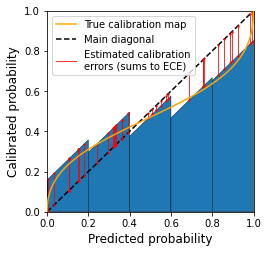

In [3]:
def create_fig_5_slope1_fit_CV(p,y,c):
    fig, ax = plt.subplots(figsize=(3.7,3.7))

    x_range = np.arange(0.0, 1.001, 0.001)

    # CF
    plt.plot(x_range, cf(x_range), c="orange", label="True calibration map", zorder=4)

    # DIAGONAL
    plt.plot([0,1], [0,1], "--", c="black", label="Main diagonal", zorder=2)

    # BINNING
    bin_scores, _ = binning_n_bins_with_crossvalidation(p, y, True, 10)
    print(bin_scores)
    optimal = np.argmin(bin_scores)
    pos_new = np.argmin(bin_scores)
    min_bin_score = np.min(bin_scores)
    max_diff = min_bin_score*0.001
    
    for pos in range(optimal-1, 0, -1):
        new_min_cand = bin_scores[pos]

        if new_min_cand <= min_bin_score + max_diff:
            pos_new = pos
    
    binning = EqualWidthBinning(p,y,c,pos_new)
    #plt.plot(x_range, binning.eval_slope_1(x_range), c="blue", label="Estimated map", zorder=2)
    print(binning.ECE_abs)
    print(np.mean(np.abs(binning.c - binning.p)))
    print(np.mean((binning.c_hat - binning.c)**2))
    polygons = binning.construct_plt_polygons_slope_1()

    for polygon in polygons:
        polygon.set_alpha(1)
        ax.add_line(polygon)
                
    # RED LINES
    np.random.seed(0)
    p_select = np.random.choice(p, 35, False)
    
    r_alpha = 0.8
    r_lw = 1
    
    plt.plot([0,0], [0,0], "-", c="red", alpha=r_alpha, label="Estimated calibration\nerrors (sums to ECE)", lw=r_lw)
    for pred in p_select:
        plt.plot([pred, pred], [pred, binning.eval_slope_1(pred)], "-", c="red", alpha=r_alpha, lw=r_lw)
        
    # RED DOTS
    s_red = 6
    plt.scatter(p_select, p_select, marker=".", c="red", s=s_red, zorder=3)
    plt.scatter(p_select, binning.eval_slope_1(p_select), marker=".", c="red", s=s_red, zorder=3)
    
    # DATA DIST
    #for i in range(len(p)):
    #    plt.plot([p[i], p[i]], [1, 1.05], c="blue" if y[i] == 1 else "red", zorder=2, lw=0.5)

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("Predicted probability", fontsize=12)
    plt.ylabel("Calibrated probability", fontsize=12)
    plt.title("")
    plt.legend(loc=2)
    
    plt.savefig("fig/fig5_slope1_CV.pdf", dpi=250, bbox_inches="tight")
    plt.show()
    
create_fig_5_slope1_fit_CV(p,y,c)

# Fig 5. PL rel diag

In [38]:
from piecewise_calib import Piecewise_NN2, node_scores_xy_with_crossvalidation

import gc
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [39]:
node_scores, all_weights, all_cv_scores = node_scores_xy_with_crossvalidation(Piecewise_NN2, 
                                                                              p, y, n_splits=5, add_error=False, 
                                                                              seed = 0, max_nodes = 10)

Nodes: 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Last epoch 145
Last epoch 129
Last epoch 146
Last epoch 150
Last epoch 150
Time for 5-fold CV for 0 nodes was 3.441674
Nodes: 1
Last epoch 204
Last epoch 297
Last epoch 388
Last epoch 213
Last epoch 300
Time for 5-fold CV for 1 nodes was 8.595443
Nodes: 2
Last epoch 204
Last epoch 129
Last epoch 146
Last epoch 194
Last epoch 123
Time for 5-fold CV for 2 nodes was 8.264199
Nodes: 3
Last epoch 193
Last epoch 119
Last epoch 200
Last epoch 143
Last epoch 123
Time for 5-fold CV for 3 nodes was 9.988134
Nodes: 4
Last epoch 104
Last epoch 82
Last epoch 175
Last epoch 110
Last epoch 117
Time for 5-fold CV for 4 nodes was 10.411187
Nodes: 5
Last epoch 85
Last epoch 75
Last epoch 79
Last epoch 141
Last epoch 112
Time for 5-fold CV for 5 nodes was 11.240530
Nodes: 6
Last epoch 85
Last epoch 112
Last epoch 94
Last epoch 161
Last epoch 108
Time for 5-fold CV for 6 nodes was 14.252825
Nodes: 7
Last epoch 183
La

In [40]:
np.argmin(node_scores)

6

In [41]:
optimal = np.argmin(node_scores)
pos_new = np.argmin(node_scores)
min_node_score = np.min(node_scores)
max_diff = min_node_score*0.001

for pos in range(optimal-1, -1, -1):
    new_min_cand = node_scores[pos]

    if new_min_cand <= min_node_score + max_diff:
        pos_new = pos
        
pos_new

2

In [42]:
model = Piecewise_NN2(k=pos_new, max_epochs=500, random_state=0, fit_x=True)
h = model.fit(p, y, verbose=False, batch_size=min(n_data//4, 512))
c_hat = model.predict(p)

In [43]:
x_nodes = np.concatenate([[0],model.model.get_weights()[0],[1]])
y_nodes = model.model.get_weights()[3]

In [44]:
polygons = []
       
for i in range(len(x_nodes)-1):
    polygon = plt.Polygon([[x_nodes[i],0],
                            [x_nodes[i+1],0],
                            [x_nodes[i+1], y_nodes[i+1]],
                            [x_nodes[i], y_nodes[i]]],
                            edgecolor="black", lw=0.4, alpha=1.0)
    polygons.append(polygon)

C:\Users\Kaspar\OneDrive\Jagatud kool\ECE artikkel\kood\abifailid\calibration_functions.py:59: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(c) * (x**a / (1-x)**b) ) )


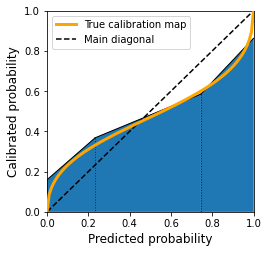

In [97]:
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(3.7,3.7))

def plot_polygons(ax, polygons):  
    for i in range(len(polygons)):
        polygon = copy(polygons[i])
        polygon.set_color("C0")
        polygon.set_alpha(1)
        ax.add_line(polygon)
        
x_range = np.arange(0.0, 1.01, 0.01)

plot_polygons(ax, polygons)

for i in range(len(x_nodes)-1):
    plt.plot([x_nodes[i], x_nodes[i+1]], [y_nodes[i], y_nodes[i+1]], c="black", lw=1, zorder=3)
    
for i in range(len(x_nodes)):
    plt.plot([x_nodes[i], x_nodes[i]], [y_nodes[i], 0], ":", c="black", zorder=3, alpha=0.7, lw=1)

#plt.scatter(x_nodes, y_nodes, marker="X", c="black",zorder=4)
    
# CF
plt.plot(x_range, cf(x_range), c="orange", label="True calibration map", zorder=5, lw=3)

# DIAGONAL
plt.plot([0,1], [0,1], "--", c="black", label="Main diagonal", zorder=1)

# RED LINES
np.random.seed(0)
p_select = np.random.choice(p, 100, False)

r_alpha = 1
r_lw = 0.5

#plt.plot([0,0], [0,0], "-", c="red", alpha=r_alpha, label="Estimated calibration\nerrors (sums to ECE)", lw=r_lw, zorder=2)
#for pred in p_select:
#    plt.plot([pred, pred], [pred, model.predict([pred])], "-", c="red", alpha=r_alpha, lw=r_lw, zorder=2)

# RED DOTS
#plt.scatter(p_select, p_select, marker=".", c="red", s=10, zorder=3)
#plt.scatter(p_select, model.predict(p_select), marker=".", c="red", s=10, zorder=3)
    

ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.xlabel("Predicted probability", fontsize=12)
plt.ylabel("Calibrated probability", fontsize=12)
plt.title("")
plt.legend()

plt.savefig("fig/fig6_PW_CV.pdf", dpi=250, bbox_inches="tight")
plt.show()